In [1]:
print("vivek")

vivek


In [1]:
import sys
sys.executable


'/Users/apple/Desktop/ML_PROJECT/venv/bin/python'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns       

In [6]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('data/data.csv')

In [10]:
df.head()

,sr_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,1,male,group B,bachelor's degree,standard,none,31,75,73
1,2,female,group B,high school,free/reduced,none,95,69,84
2,3,male,group E,some high school,standard,none,25,82,54
3,4,female,group C,associate's degree,standard,none,66,71,23
4,5,male,group D,some college,free/reduced,completed,86,27,31


In [11]:
df.shape

(1002, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sr_no                        1002 non-null   int64 
 1   gender                       1002 non-null   object
 2   race_ethnicity               1002 non-null   object
 3   parental_level_of_education  1002 non-null   object
 4   lunch                        1002 non-null   object
 5   test_preparation_course      1002 non-null   object
 6   math_score                   1002 non-null   int64 
 7   reading_score                1002 non-null   int64 
 8   writing_score                1002 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.6+ KB


In [13]:
df.isna().sum()

sr_no                          0
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(2)

In [16]:
df.nunique()

sr_no                          1000
gender                            2
race_ethnicity                    5
parental_level_of_education       6
lunch                             2
test_preparation_course           2
math_score                       81
reading_score                    81
writing_score                    81
dtype: int64

In [18]:
df.describe()

,sr_no,math_score,reading_score,writing_score
count,1002.000000,1002.000000,1002.000000,1002.000000
mean,501.497006,60.649701,60.208583,60.998004
std,289.391615,23.076514,23.516216,23.092266
min,1.000000,20.000000,20.000000,20.000000
25%,251.250000,42.000000,39.000000,40.000000
50%,501.500000,61.000000,61.000000,62.000000
75%,751.750000,80.000000,80.750000,80.750000
max,1000.000000,100.000000,100.000000,100.000000


In [21]:
print("categories in gender:",end='')
print(df['gender'].unique())

print("categories in race/ethnicity:",end='')
print(df['race_ethnicity'].unique())        

print("categories in parental level of education:",end='')
print(df['parental_level_of_education'].unique())

print("categories in lunch:",end='')
print(df['lunch'].unique())

print("categories in test preparation course:",end='')
print(df['test_preparation_course'].unique())   


categories in gender:['male' 'female']
categories in race/ethnicity:['group B' 'group E' 'group C' 'group D' 'group A']
categories in parental level of education:["bachelor's degree" 'high school' 'some high school' "associate's degree"
 'some college' "master's degree"]
categories in lunch:['standard' 'free/reduced']
categories in test preparation course:['none' 'completed']


In [24]:
#define numeric and categorical features
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features= [feature for feature in df.columns if df[feature].dtype=='O']

print("Numeric features:",numeric_features)
print("Categorical features:",categorical_features)

Numeric features: ['sr_no', 'math_score', 'reading_score', 'writing_score']
Categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [27]:
df['average_score'] = (
    df['math_score'] + df['reading_score'] + df['writing_score']
) / 3

df.head()


,sr_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,1,male,group B,bachelor's degree,standard,none,31,75,73,179,59.666667
1,2,female,group B,high school,free/reduced,none,95,69,84,248,82.666667
2,3,male,group E,some high school,standard,none,25,82,54,161,53.666667
3,4,female,group C,associate's degree,standard,none,66,71,23,160,53.333333
4,5,male,group D,some college,free/reduced,completed,86,27,31,144,48.000000


In [28]:
reading_full =df[df['reading_score' ]==100]['average_score'].count()
wrting_full =df[df['writing_score' ]==100]['average_score'].count()
math_full =df[df['math_score' ]==100]['average_score'].count()

print("Number of students with full marks in reading:",reading_full)
print("Number of students with full marks in writing:",wrting_full)
print("Number of students with full marks in math:",math_full)  

Number of students with full marks in reading: 14
Number of students with full marks in writing: 12
Number of students with full marks in math: 13


In [32]:
readin_less_33 =df[df['reading_score' ]<33]['average_score'].count()
writing_less_33 =df[df['writing_score' ]<33]['average_score'].count()
math_less_33 =df[df['math_score' ]<33]['average_score'].count() 
print("Number of students with less than 33 marks in reading:",readin_less_33)
print("Number of students with less than 33 marks in writing:",writing_less_33)
print("Number of students with less than 33 marks in math:",math_less_33)

Number of students with less than 33 marks in reading: 168
Number of students with less than 33 marks in writing: 156
Number of students with less than 33 marks in math: 148


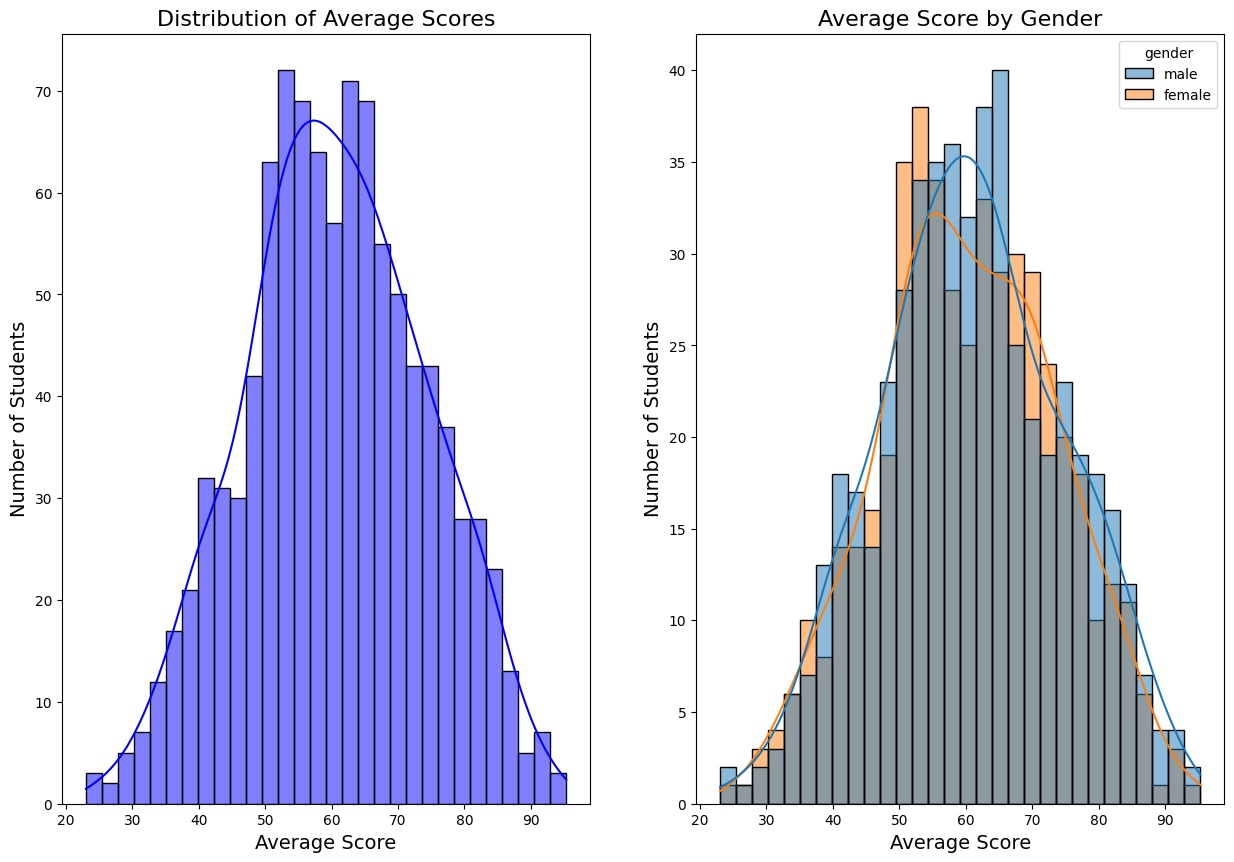

In [44]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.histplot(data=df, x='average_score', kde=True, bins=30, color='blue')
plt.title('Distribution of Average Scores', fontsize=16)
plt.xlabel('Average Score', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

plt.subplot(1,2,2)
sns.histplot(data=df, x='average_score', kde=True, bins=30, hue='gender')
plt.title('Average Score by Gender', fontsize=16)
plt.xlabel('Average Score', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

plt.show()


Indight 
* Female students tend to perform more than male


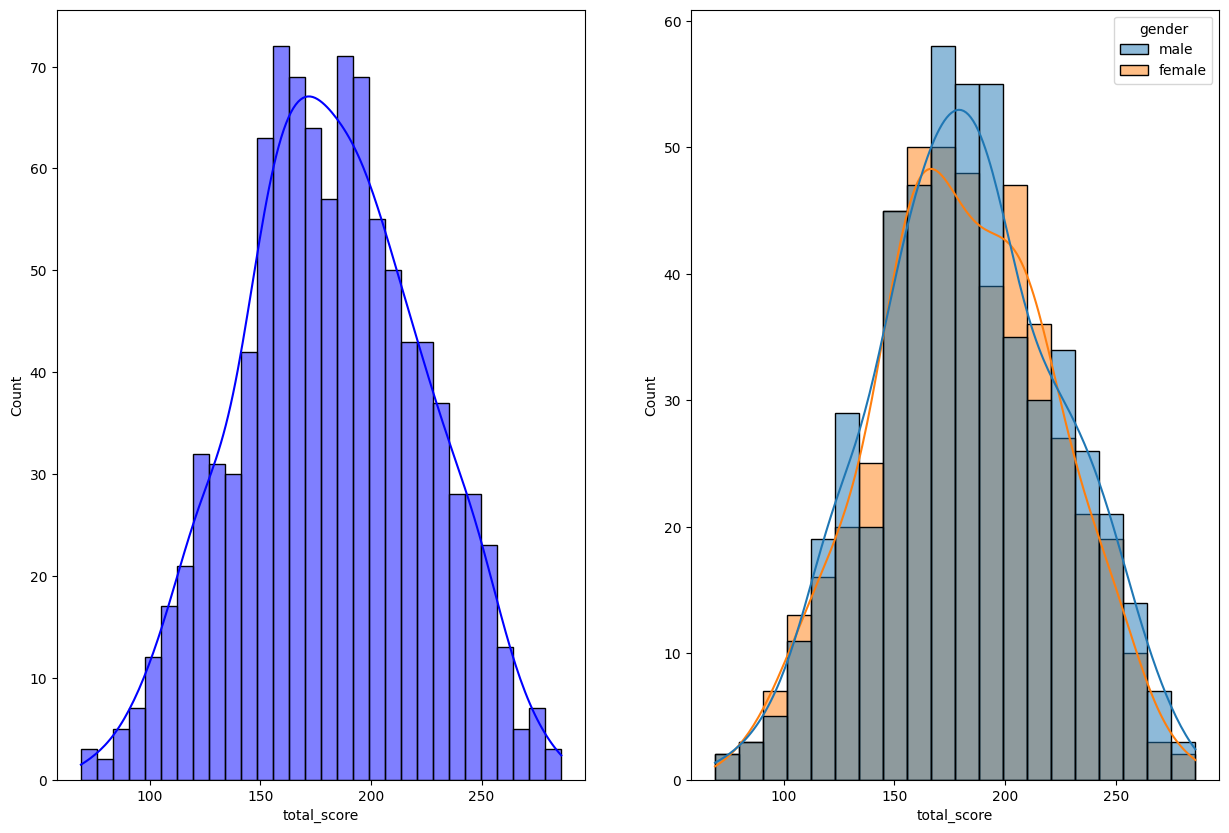

In [43]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='blue')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')

plt.show()


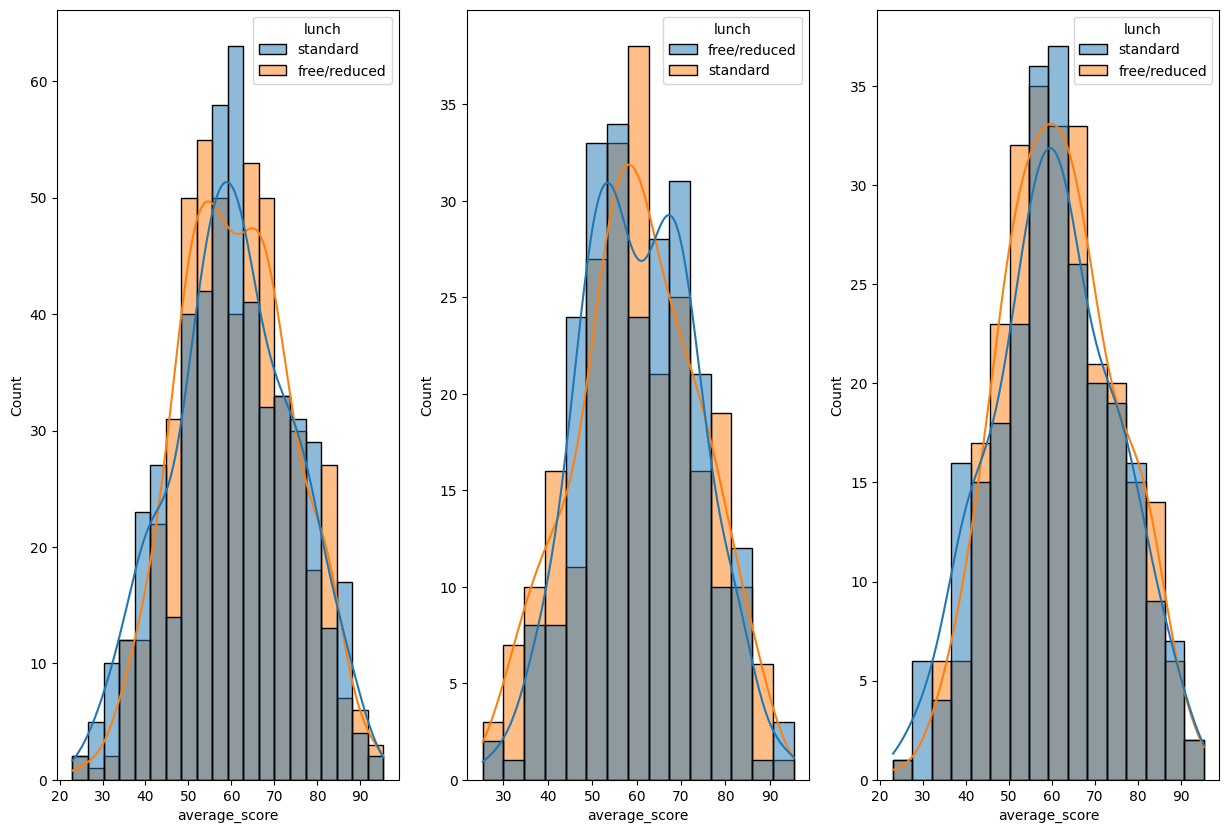

In [46]:


fig, axs = plt.subplots(1, 3, figsize=(15, 10))

sns.histplot(
    data=df,
    x='average_score',
    kde=True,
    hue='lunch',
    ax=axs[0]
)

sns.histplot(
    data=df[df['gender'] == 'female'],
    x='average_score',
    kde=True,
    hue='lunch',
    ax=axs[1]
)

sns.histplot(
    data=df[df['gender'] == 'male'],
    x='average_score',
    kde=True,
    hue='lunch',
    ax=axs[2]
)

plt.show()


In [ ]:
Insights 

* stanadard lunch students perform better than free/reduced lunch students.
* This trend is more pronounced among
* standar lunch helps perform well in exams